# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [ ]:
PROJECT = 'beans-tabular-IIT-G'
DATA_DIR = '/content/drive/MyDrive/W&B'

In [ ]:
# Read csvs to DataFrame
train_df = pd.read_csv(f'{DATA_DIR}/train_c.csv')
train_df = train_df.sample(frac=1)  # shuffle the train data
train_df.reset_index(inplace=True, drop=True)

val_df = pd.read_csv(f'{DATA_DIR}/val.csv')
test_df = pd.read_csv(f'{DATA_DIR}/test_no_label.csv')

train_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,id
0,39768,785.134,314.380864,162.392893,1.935927,0.856258,40336,225.020422,0.797305,0.985918,0.810692,0.715757,0.007905,0.001280,0.512309,0.991792,HOROZ,2770
1,59471,957.540,0.000000,211.622139,1.707620,0.810593,60328,275.174179,0.668965,0.985794,0.815082,0.761475,0.006076,0.001260,0.579844,0.990152,HOROZ,1914
2,60942,1020.605,413.970269,187.850317,2.203724,0.891115,61764,278.556573,0.678400,0.986691,0.735210,0.672890,0.006793,0.000859,0.452781,0.997805,HOROZ,6805
3,47142,845.750,329.745636,186.277180,1.770188,0.825151,48742,244.996038,0.693775,0.967174,0.828197,0.742985,0.006995,0.001315,0.552027,0.977191,HOROZ,6051
4,56462,967.154,0.000000,180.514843,2.227299,0.893545,57430,268.122456,0.765836,0.983145,0.758534,0.666871,0.007121,0.000869,0.444717,0.990517,HOROZ,2316


#EDA

In [ ]:
train_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,id
count,7589.00000,7589.000000,7589.000000,7589.000000,7589.000000,7589.000000,7589.000000,7589.000000,7589.000000,7589.000000,7589.000000,7589.000000,7589.000000,7589.000000,7589.000000,7589.000000,7589.000000
mean,42577.11912,855.427398,304.328146,202.355417,1.582963,0.751062,53887.227039,253.163509,0.749890,0.987187,0.873612,0.799867,0.006567,0.001716,0.643555,0.995102,3794.000000
std,43669.70026,216.996666,109.641948,45.693510,0.245005,0.091533,30343.698394,60.033764,0.048621,0.004626,0.059058,0.061387,0.001140,0.000595,0.098507,0.004376,2190.899929
min,-230867.00000,524.736000,0.000000,122.512653,1.049424,0.303273,20684.000000,161.243764,0.566669,0.943559,0.571801,0.640577,0.002778,0.000564,0.410339,0.949990,0.000000
25%,33418.00000,703.568000,248.868231,175.466484,1.432982,0.716248,36663.000000,214.961414,0.718616,0.985741,0.833570,0.762765,0.005900,0.001157,0.581811,0.993797,1897.000000
50%,42490.00000,794.308000,290.557350,192.221690,1.553338,0.765215,45105.000000,238.176226,0.759709,0.988301,0.883375,0.800690,0.006652,0.001693,0.641105,0.996424,3794.000000
75%,58200.00000,975.344000,372.954622,217.107222,1.706102,0.810216,62010.000000,278.892328,0.786873,0.990033,0.916599,0.834178,0.007286,0.002166,0.695852,0.997869,5691.000000
max,254616.00000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.858420,0.994677,0.987920,0.975595,0.010451,0.003564,0.951785,0.999733,7588.000000


* id column can be dropped
* no null values.


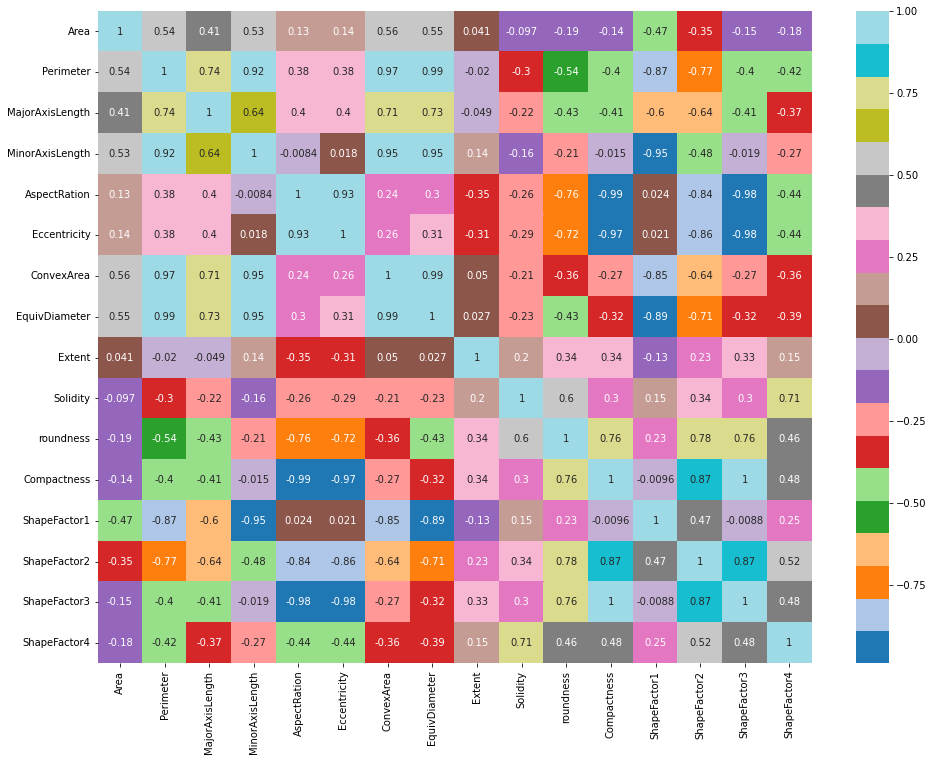

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(train_df.drop('id',axis=1).corr(), annot=True,cmap="tab20")

* Most of the values are correlated to each other.
* ShapeFactor3 and Compactness are completely correlated.
* EquivDiameter and perimeter are completely correlated.
* Compactness and Eccentricity are completly correlated.

In [ ]:
train_df['Class'].value_counts()

DERMASON    1997
SIRA        1462
SEKER       1132
HOROZ       1063
CALI         887
BARBUNYA     739
BOMBAY       309
Name: Class, dtype: int64

In [ ]:
class_map = {
    'DERMASON':0,
    'SIRA':1,
    'SEKER':2,
    'HOROZ':3,
    'CALI':4,
    'BARBUNYA':5,
    'BOMBAY':6
}
train_df['Class'] = train_df['Class'].apply(lambda x: class_map[x])
train_df['Class'].value_counts()

0    1997
1    1462
2    1132
3    1063
4     887
5     739
6     309
Name: Class, dtype: int64

# DISTRIBUTIONS

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd9fc128a50>,
      dtype=object)

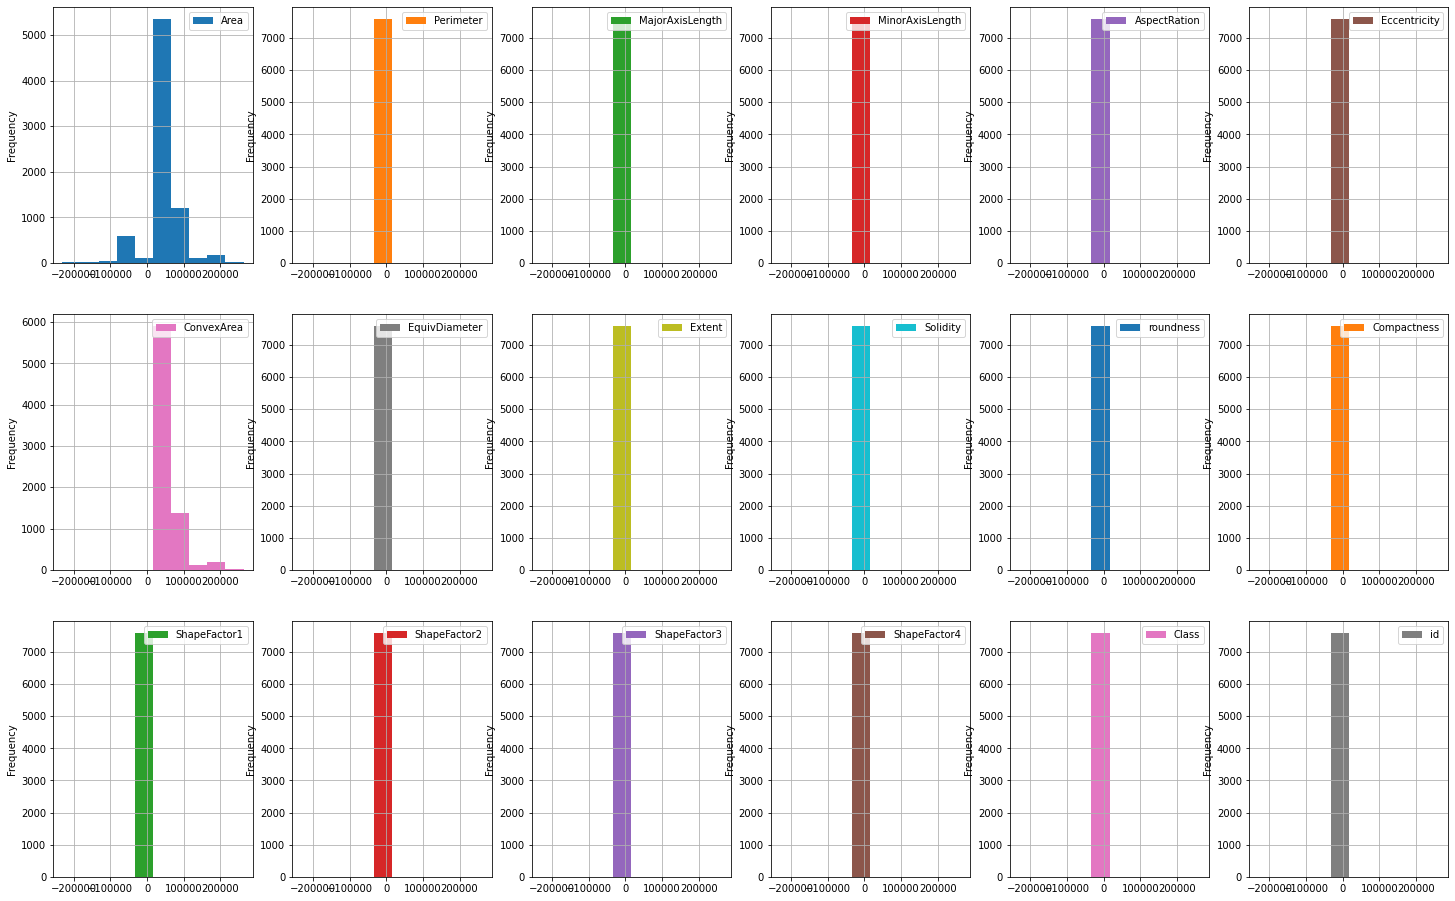

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=6,figsize=(25, 16))

train_df.plot.hist( subplots = True, grid = True,ax=axes)

In [34]:
train_df['id'].nunique()

7589

# DIMENSIONALITY REDUCTION FOR VISUALIZING LABELS

In [ ]:
from sklearn.manifold import TSNE

* Without scaling

In [44]:
X = train_df.drop('id',axis=1)
tsne = TSNE(n_components=2, random_state=0,init='pca')
x_test_ = tsne.fit_transform(X)
y = X['Class']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


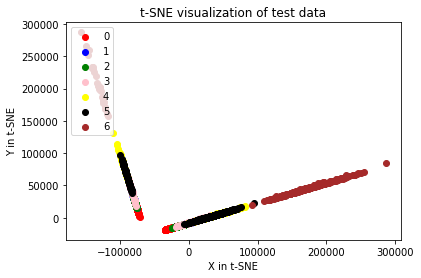

In [43]:
import numpy as np
#Build the scatter plot with the two types of transactions.
color_map = {0:'red', 1:'blue',2:'green',3:'pink',4:'yellow',5:'black',6:'brown'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_[y==cl,0], 
                y = x_test_[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')  
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
x_test_2d = StandardScaler().fit_transform(X)


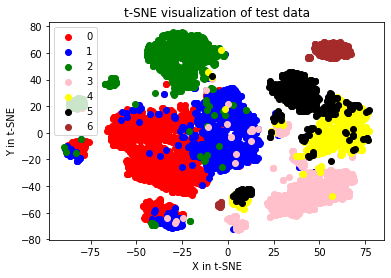

In [45]:
import numpy as np
#Build the scatter plot with the two types of transactions.
color_map = {0:'red', 1:'blue',2:'green',3:'pink',4:'yellow',5:'black',6:'brown'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], 
                y = x_test_2d[y==cl,1], 
                c = color_map[idx], 
                label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')  
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

* We can see few overlapping of labels